In [62]:
#pip install seaborn

# Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

In [2]:
# Raw dataset drop NA
df = pd.read_csv("../resources/train_predict.csv")
# Drop the null columns where all values are null
df1 = df.dropna(axis='columns', how='all')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Reviewing the % of null values
100*df1.isnull().sum()/df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [4]:
# Drop the null rows data cleaning, making all column headers lowercase
loan_df = df.dropna()
loan_df.columns=df.columns.str.lower()
loan_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
#Update column names
loan_df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed'
            , 'income', 'co_income'
            , 'loan_amount', 'loan_term', 'credit_history', 'property_area', 'loan_status']

In [6]:
#Test data_df after drop NAN
loan_df.dtypes

loan_id            object
gender             object
married            object
dependents         object
education          object
self_employed      object
income              int64
co_income         float64
loan_amount       float64
loan_term         float64
credit_history    float64
property_area      object
loan_status        object
dtype: object

In [7]:
loan_df.shape

(480, 13)

In [8]:
#Reviewing data
loan_df['dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [9]:
#Reviewing data
loan_df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
#Reviewing data
loan_df['loan_term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [11]:
#Reviewing data
loan_df['credit_history'].unique()

array([1., 0.])

In [12]:
loan_df.describe()

,income,co_income,loan_amount,loan_term,credit_history
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# Select your features (columns)

In [13]:
# Set features. This will also be used as your x values. Removed 'loan_id', 'property_area'
loan_features_df = loan_df[['gender', 'married', 'dependents', 'education','self_employed'
            , 'income', 'co_income'
            , 'loan_amount', 'loan_term', 'credit_history', 'loan_status']]
loan_features_df.head()

,gender,married,dependents,education,self_employed,income,co_income,loan_amount,loan_term,credit_history,loan_status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y


<AxesSubplot:xlabel='count', ylabel='loan_term'>

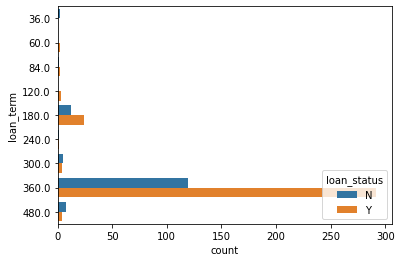

In [14]:
sns.countplot(y='loan_term', hue ='loan_status',data =loan_features_df)

<AxesSubplot:xlabel='count', ylabel='married'>

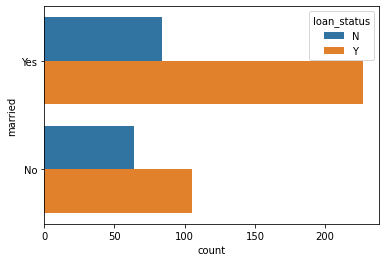

In [15]:
sns.countplot(y='married', hue ='loan_status',data =loan_features_df)

<AxesSubplot:xlabel='count', ylabel='gender'>

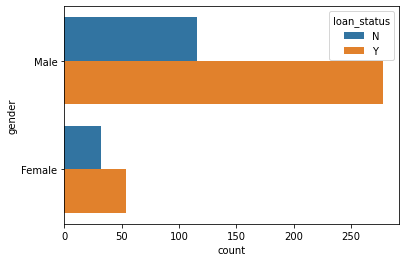

In [16]:
sns.countplot(y='gender', hue ='loan_status',data =loan_features_df)

<AxesSubplot:xlabel='count', ylabel='credit_history'>

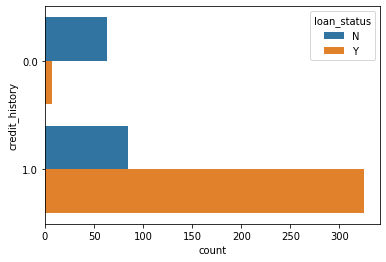

In [17]:
sns.countplot(y='credit_history', hue ='loan_status',data =loan_features_df)

# Create a Train Test Split

Use `loan_status` for the y values

In [37]:
y = loan_features_df[["loan_status"]] 
X = loan_features_df.drop(columns=["loan_status"])
print(X.shape, y.shape)

(480, 10) (480, 1)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [39]:
#code to numberic  Hold->  ‘Urban’: 3, ‘Semiurban’: 2,’Rural’: 1,
code_numeric = {'Female': 1, 'Male': 2,'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2, 'Y': 1, 'N': 0, '3+': 3}

In [40]:
#code to numberic 
loan_features_df = loan_features_df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [41]:
loan_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          480 non-null    int64  
 1   married         480 non-null    int64  
 2   dependents      480 non-null    object 
 3   education       480 non-null    int64  
 4   self_employed   480 non-null    int64  
 5   income          480 non-null    int64  
 6   co_income       480 non-null    float64
 7   loan_amount     480 non-null    float64
 8   loan_term       480 non-null    float64
 9   credit_history  480 non-null    float64
 10  loan_status     480 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 65.0+ KB


# Pre-processing

Scale the data and perform some feature selection

In [42]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaler = StandardScaler().fit(X_train)

In [44]:
# Preprocessing

from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


# Train the Model


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=500, activation='relu', input_dim=10))
# model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1002      
Total params: 6,502
Trainable params: 6,502
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
360/360 - 0s - loss: 0.6050 - acc: 0.7500
Epoch 2/100
360/360 - 0s - loss: 0.5236 - acc: 0.8000
Epoch 3/100
360/360 - 0s - loss: 0.4835 - acc: 0.8028
Epoch 4/100
360/360 - 0s - loss: 0.4736 - acc: 0.8028
Epoch 5/100
360/360 - 0s - loss: 0.4639 - acc: 0.8111
Epoch 6/100
360/360 - 0s - loss: 0.4578 - acc: 0.8167
Epoch 7/100
360/360 - 0s - loss: 0.4492 - acc: 0.8167
Epoch 8/100
360/360 - 0s - loss: 0.4446 - acc: 0.8194
Epoch 9/100
360/360 - 0s - loss: 0.4392 - acc: 0.8222
Epoch 10/100
360/360 - 0s - loss: 0.4344 - acc: 0.8278
Epoch 11/100
360/360 - 0s - loss: 0.4309 - acc: 0.8278
Epoch 12/100
360/360 - 0s - loss: 0.4283 - acc: 0.8333
Epoch 13/100
360/360 - 0s - loss: 0.4227 - acc: 0.8333
Epoch 14/100
360/360 - 0s - loss: 0.4197 - acc: 0.8333
Epoch 15/100
360/360 - 0s - loss: 0.4195 - acc: 0.8361
Epoch 16/100
360/360 - 0s - loss: 0.4157 - acc: 0.8306
Epoch 17/100
360/360 - 0s - loss: 0.4146 - acc: 0.8361
Epoch 18/100
360/360 - 0s - loss: 0.4100 - acc: 0.8333
Epoch 19/100
360/36

In [49]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train.values.ravel())

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7972222222222223
Testing Data Score: 0.8416666666666667


In [50]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.05      0.10        37
           1       0.70      0.99      0.82        83

    accuracy                           0.70       120
   macro avg       0.68      0.52      0.46       120
weighted avg       0.69      0.70      0.60       120



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [51]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 2, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [52]:
# Train the model with GridSearch
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.750, total=  33.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.6s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.722, total= 1.3min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.736, total= 2.2min
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.722, total=  26.8s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.722, total=  45.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.750, total=  34.6s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.722, total= 1.3min
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.736, total= 2.2min
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.722, total=  27.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 82.7min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [53]:
#print params, scores
print(grid.best_params_)
print(grid.best_score_)

{'C': 2, 'gamma': 0.0001}
0.7416666666666667


# Save the Model

In [54]:
import joblib

In [55]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
filename = 'Final_loan_model1.sav'
joblib.dump(model, filename)
 


['Final_loan_model1.sav']

In [56]:
#To be done later, load the model from disk

# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, y_test_categorical)
# print(result)